# Projeto 4: Previsão do preço de casas

Base de dados: https://www.kaggle.com/harlfoxem/housesalesprediction

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

# Etapa 2: Importação da base de dados

In [ ]:
house_df = pd.read_csv('kc-house-data.csv', encoding = 'ISO-8859-1')

In [ ]:
house_df.head()

id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [ ]:
house_df.tail(10)

id             date      price  bedrooms  bathrooms  \
21603  7852140040  20140825T000000   507250.0         3       2.50   
21604  9834201367  20150126T000000   429000.0         3       2.00   
21605  3448900210  20141014T000000   610685.0         4       2.50   
21606  7936000429  20150326T000000  1007500.0         4       3.50   
21607  2997800021  20150219T000000   475000.0         3       2.50   
21608   263000018  20140521T000000   360000.0         3       2.50   
21609  6600060120  20150223T000000   400000.0         4       2.50   
21610  1523300141  20140623T000000   402101.0         2       0.75   
21611   291310100  20150116T000000   400000.0         3       2.50   
21612  1523300157  20141015T000000   325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21603         2270      5536     2.0           0     0  ...      8   
21604         1490      1126     3.0           0     0  ...      8   
21605         2520      6023     2.0           0     0  ...      9   
21606         3510      7200     2.0           0     0  ...      9   
21607         1310      1294     2.0           0     0  ...      8   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21603        2270              0      2003             0    98065  47.5389   
21604        1490              0      2014             0    98144  47.5699   
21605        2520              0      2014             0    98056  47.5137   
21606        2600            910      2009             0    98136  47.5537   
21607        1180            130      2008             0    98116  47.5773   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21603 -121.881           2270        5731  
21604 -122.288           1400        1230  
21605 -122.167           2520        6023  
21606 -122.398           2050        6200  
21607 -122.409           1330        1265  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[10 rows x 21 columns]

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# Etapa 3: Visualização dos dados

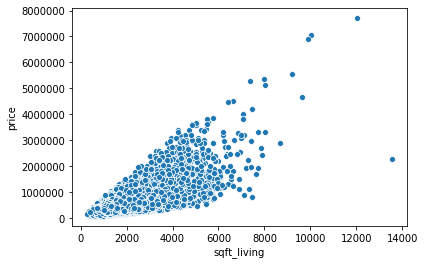

In [ ]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df);

<ipython-input-17-4b5b75f57eb3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_df.corr(), annot = True);


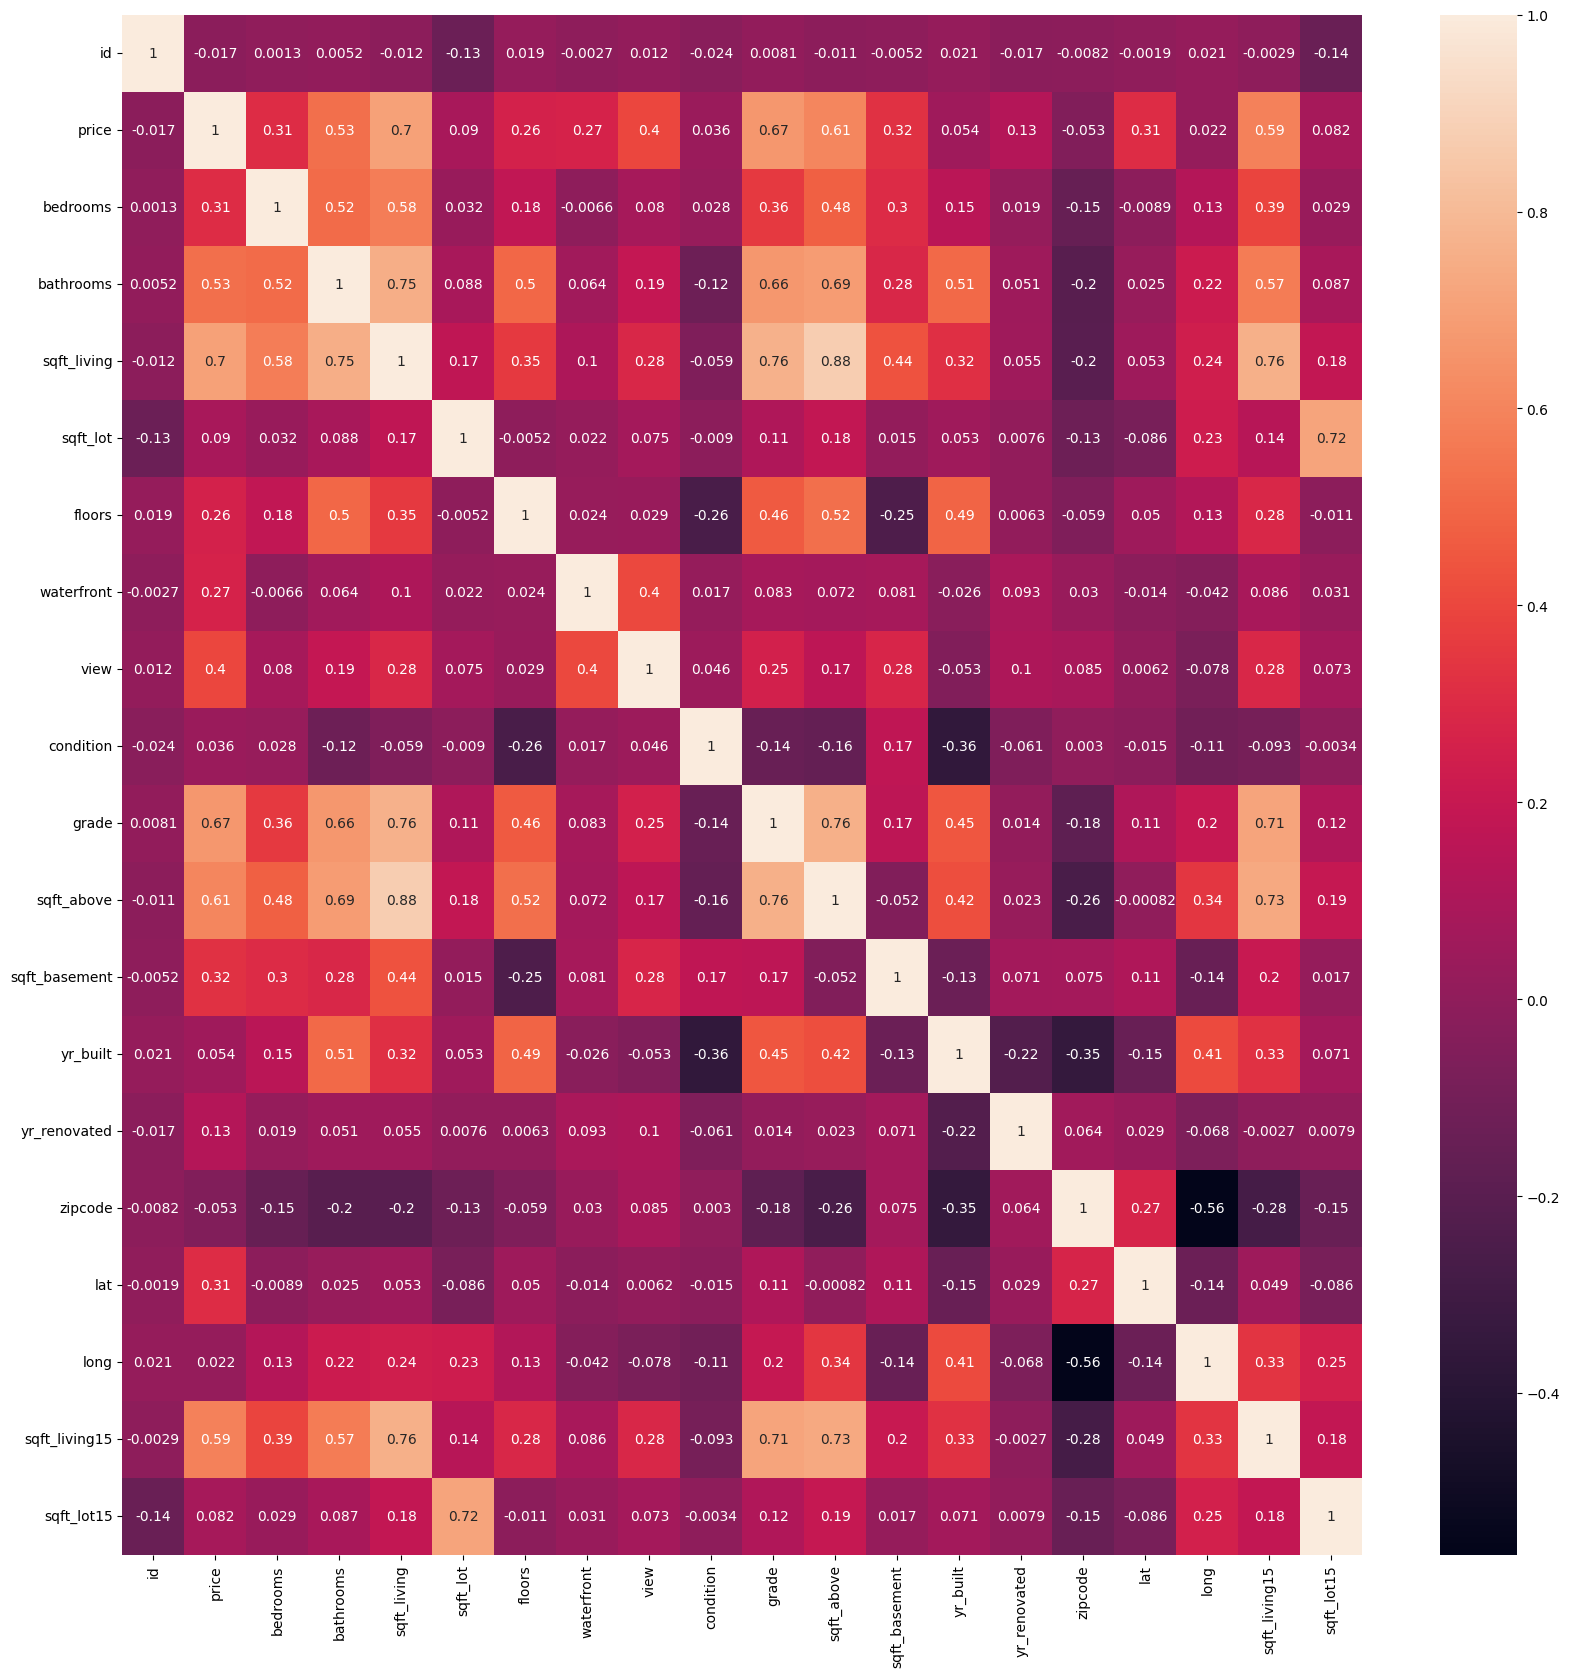

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True);

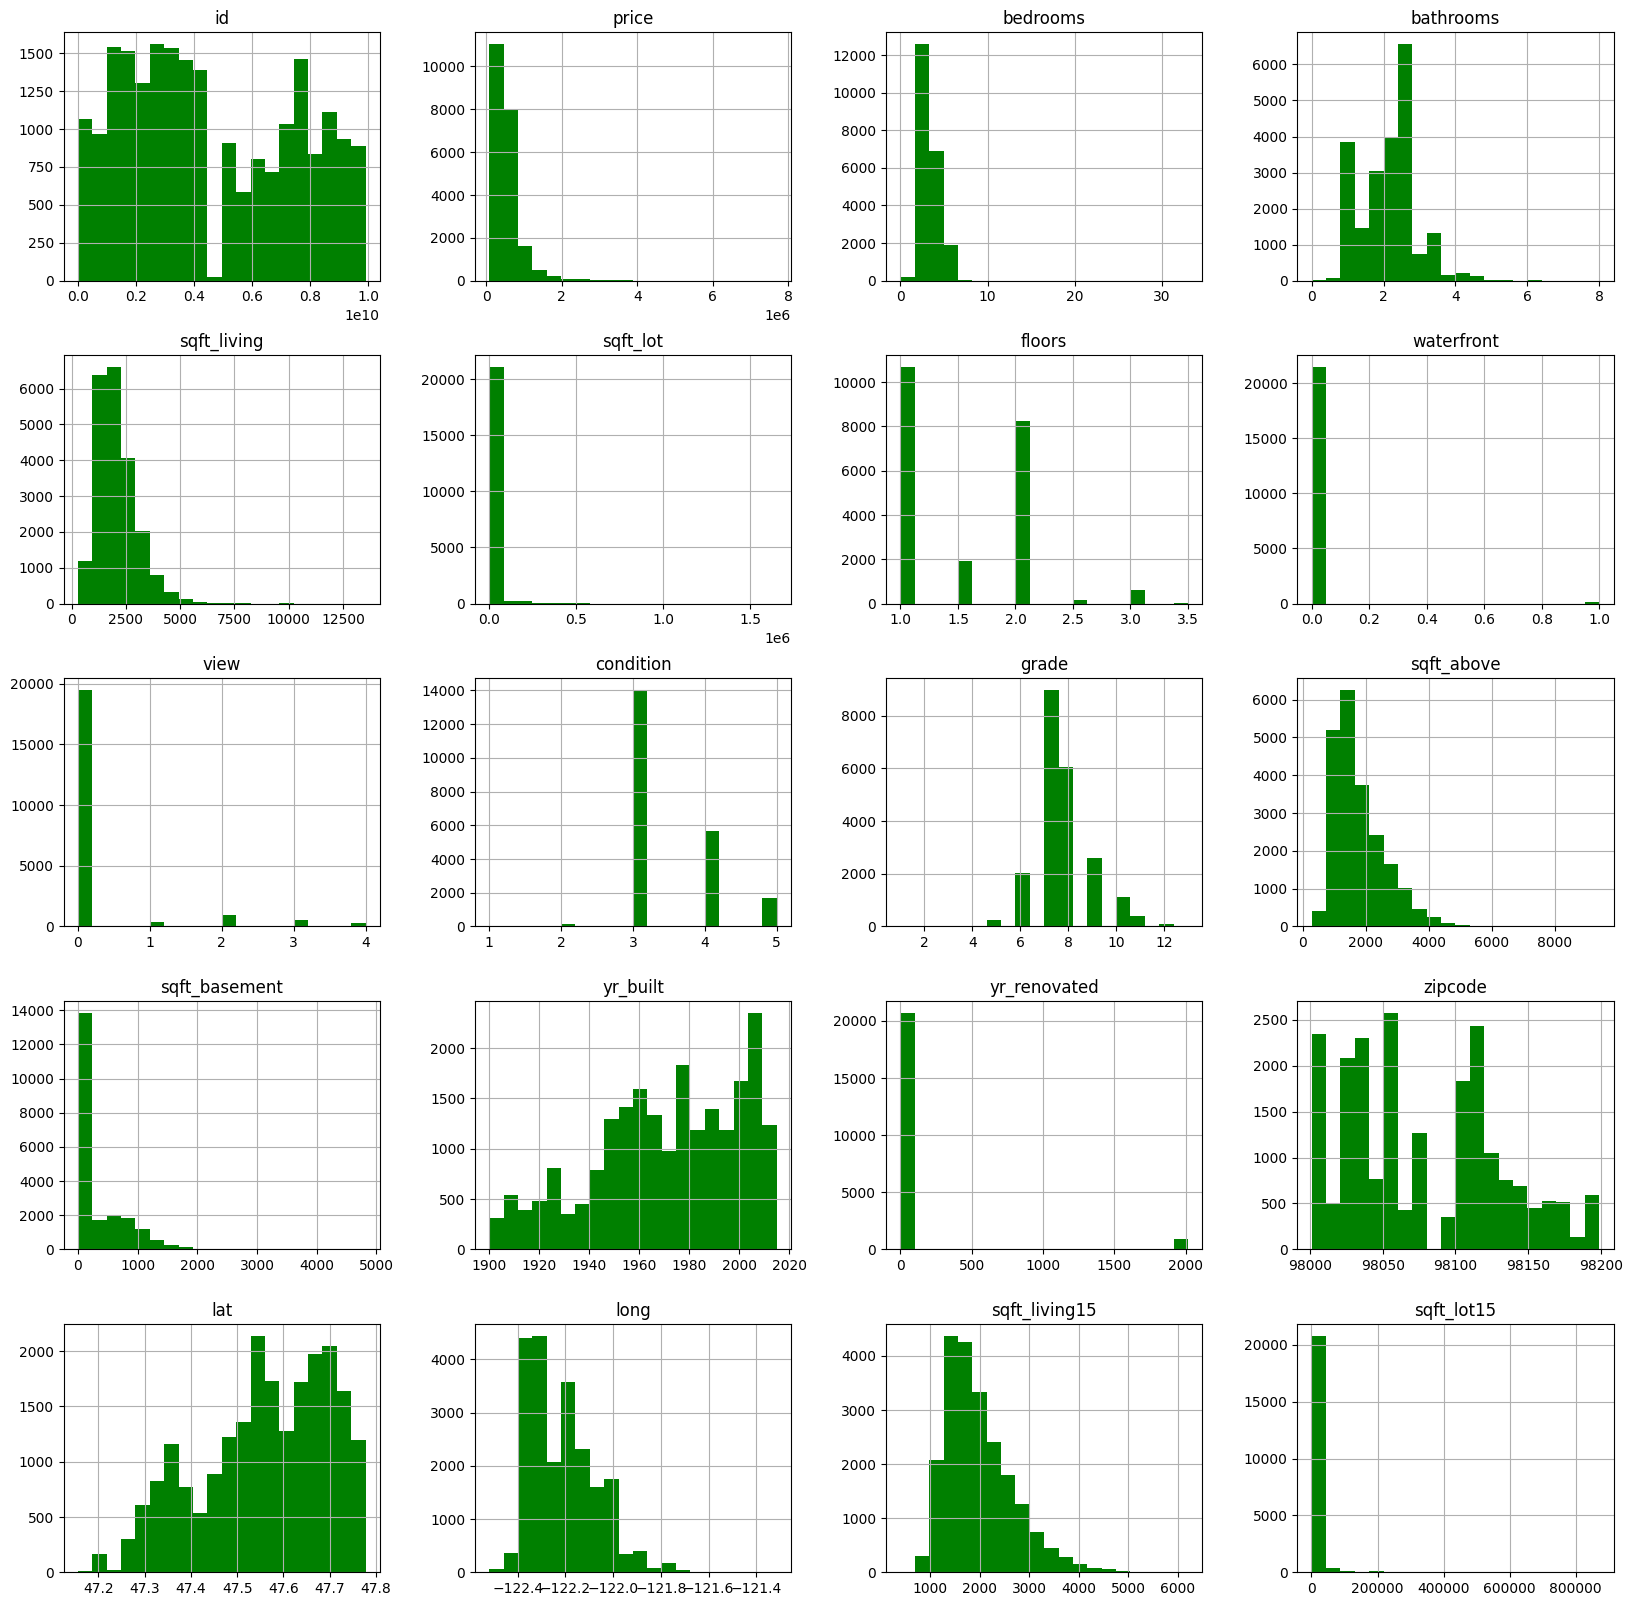

In [ ]:
house_df.hist(bins = 20, figsize = (20,20), color = 'g');

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7946bcbae290> (for post_execute):


KeyboardInterrupt: ignored

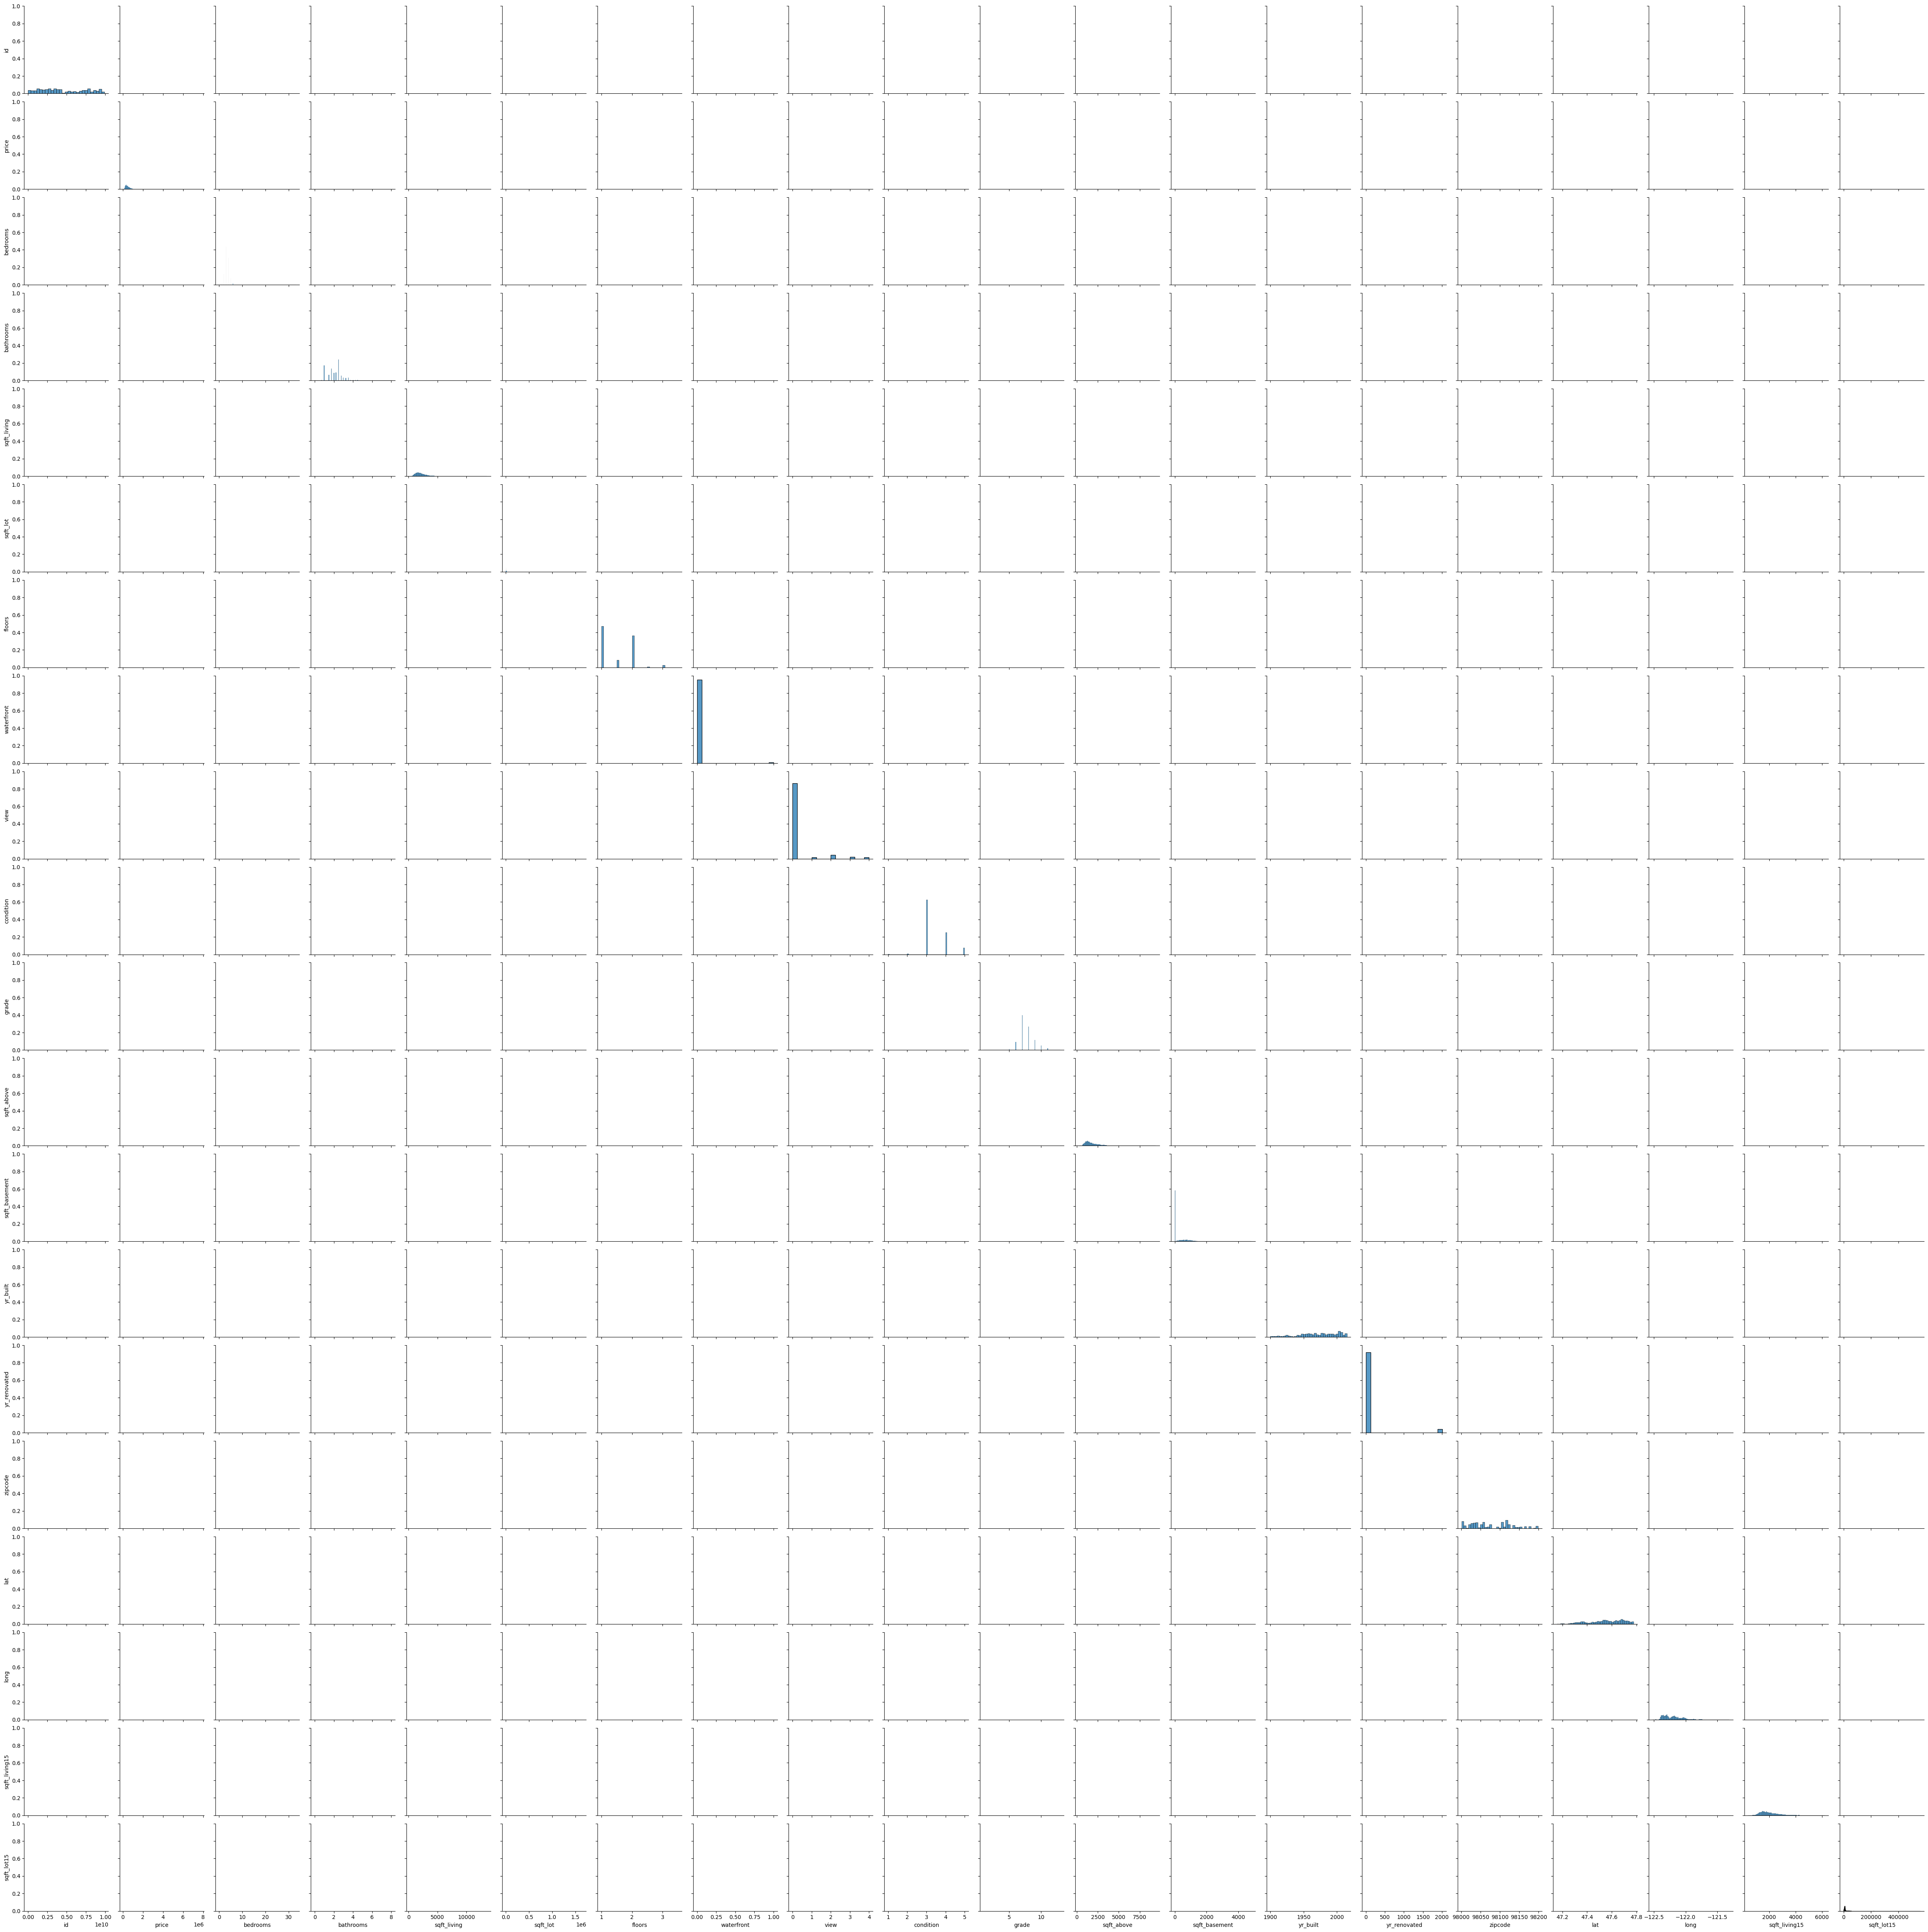

In [ ]:
sns.pairplot(house_df);

# Etapa 4: Tratamento da base de dados

In [ ]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [ ]:
X = house_df[selected_features]#Independet variables

In [ ]:
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0         3       1.00         1180      5650     1.0        1180   
1         3       2.25         2570      7242     2.0        2170   
2         2       1.00          770     10000     1.0         770   
3         4       3.00         1960      5000     1.0        1050   
4         3       2.00         1680      8080     1.0        1680   

   sqft_basement  
0              0  
1            400  
2              0  
3            910  
4              0

In [ ]:
y = house_df['price']#Dependent Variable

In [ ]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [ ]:
X.shape

(21613, 7)

In [ ]:
y.shape

(21613,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [ ]:
X_scaled.shape

(21613, 7)

In [ ]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [ ]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y.shape

(21613, 1)

In [ ]:
y_scaled = scaler.fit_transform(y)

In [ ]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)
#Define that 25% of the total data will be used to test the model

In [ ]:
X_train.shape

(16209, 7)

In [ ]:
X_test.shape

(5404, 7)

# Etapa 5: Construção e criação do modelo

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21101 (82.43 KB)
Trainable params: 21101 (82.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 9.8965e-04
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 9.9032e-04
Epoch 6/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 9.9177e-04
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 9.9925e-04
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 9.9680e-04 - val_loss: 0.0010
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.8643e-04
Epoch 10/100
260/260 [==============================] - 0s 2ms/step

# Etapa 6: Avaliação do modelo

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

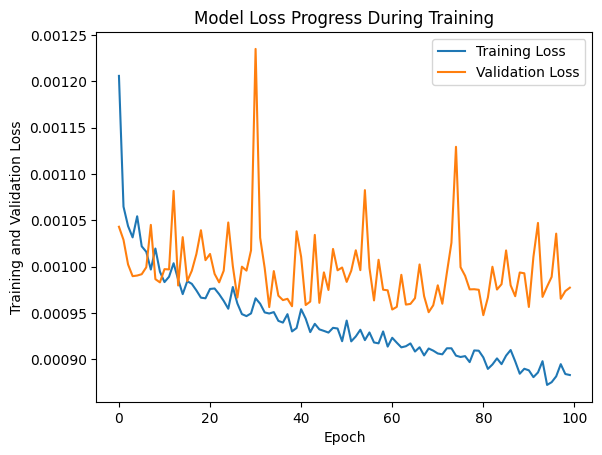

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

In [ ]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

1/1 [==============================] - 0s 65ms/step


array([[236572.95]], dtype=float32)

169/169 [==============================] - 0s 816us/step


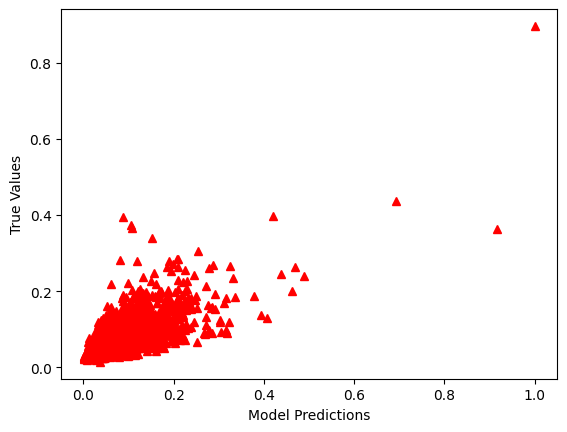

In [ ]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [ ]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

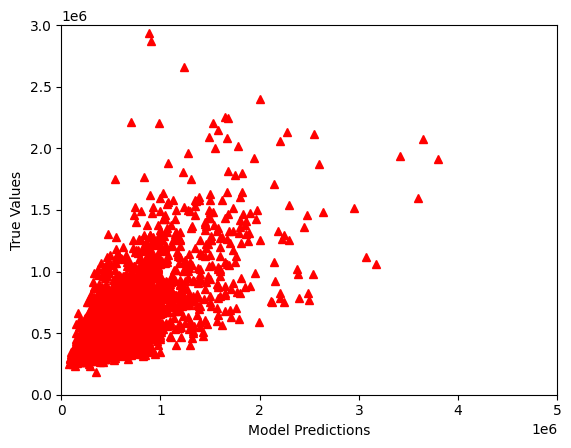

In [ ]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 241989.885 
MSE = 58559104420.876595 
MAE = 154777.83958930883 
R2 = 0.5611407169399606 
Adjusted R2 = 0.5605714035631222


# Etapa 7: Aumento da quantidade de características

In [ ]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [ ]:
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0         3       1.00         1180      5650     1.0        1180   
1         3       2.25         2570      7242     2.0        2170   
2         2       1.00          770     10000     1.0         770   
3         4       3.00         1960      5000     1.0        1050   
4         3       2.00         1680      8080     1.0        1680   

   sqft_basement  waterfront  view  condition  grade  sqft_above  yr_built  \
0              0           0     0          3      7        1180      1955   
1            400           0     0          3      7        2170      1951   
2              0           0     0          3      6         770      1933   
3            910           0     0          5      7        1050      1965   
4              0           0     0          3      8        1680      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [ ]:
y = house_df['price']

In [ ]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 8.0598e-04 - val_loss: 9.5788e-04
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 5.4594e-04 - val_loss: 4.4510e-04
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 4.5432e-04 - val_loss: 4.7476e-04
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 4.3481e-04 - val_loss: 3.8214e-04
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 4.1073e-04 - val_loss: 4.2384e-04
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 3.6443e-04 - val_loss: 3.7572e-04
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 3.5225e-04 - val_loss: 3.0285e-04
Epoch 8/100
260/260 [==============================] - 0s 2ms/step - loss: 3.3460e-04 - val_loss: 3.7880e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 3.3601e-04 - val_loss: 3.7390e-04
Epoch 10/100
260/26

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss']);

169/169 [==============================] - 0s 887us/step


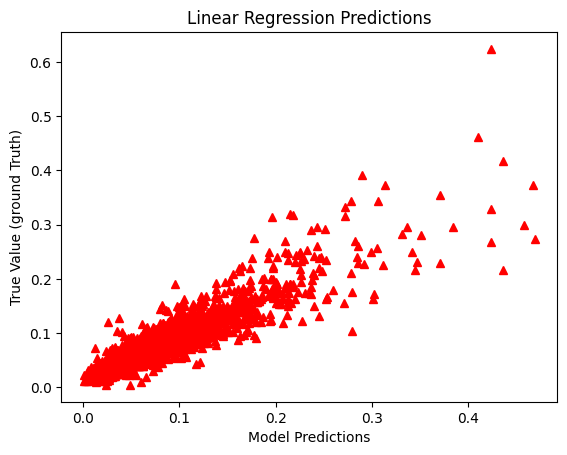

In [ ]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [ ]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 127673.09 
MSE = 16300417846.233152 
MAE = 76329.68585625231 
R2 = 0.8626304184346465 
Adjusted R2 = 0.8624522147521118
